# Lecture 4. Graphical Methods of analyzing ODEs

Things to add:  
    - Discussion how to make pretty plots  
    - Discuss how numerical methods can give solution only from initial conditions and sometimes it is good to get a big picture overview  
    - Chapter 7 of Edwards Penney

**The goal of this jupyter notebook is to introduce you to graphical methods of analyzing differential equations without solving them. We will also review various options for plotting data using python library matplotlib.**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Introduction to Graphical Methods

Let's take an ODE $\frac{dy(t)}{dt}=f(t,y(t))$

It is possible to plot the outlines of this ODE solution using only $f(t,y)$ without solving the differential equation.  
Previously we reviewed numerical methods of solving ODE that can give us the solution of this ODE starting from some initial conditions $y(t_0)$. However, this only one solution of this ODE that goes through $y(t_0)$ and there's an infinite number of other solutions. In addition, sometime there's no solution goes through $y(t_0)$.  
Therefore, it is often useful to be able to "see" how all the solutions look like using graphical methods reviewed here even though we can't use graphical methods to make precise quantitative prediction like with numerical or analytical solutions.  
Some the properties of solutions that we can see using graphical methods include steady state, oscillation, stable and unstable points etc.




Lets use bacterial growth rate in rich media as an example:
  
$\frac{dN(t)}{dt}=kN(t)$  

where $t$ is time,  
k is some constant specific for this E.coli strain and growth conditions,  
$N(t)$ is number of E. coli at time $t$.  
Let's plot a numerical solution to this ODE with $N(t=0)=1$ and $k=1$:

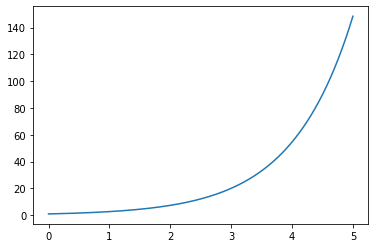

In [4]:
k = 1
N_0 = [1]
tspan = [0, 5]


def fun(t, y):
    dN_dt = k * y
    return dN_dt


soln = solve_ivp(fun, tspan, N_0, t_eval=np.linspace(0, 5, 1000))

plt.plot(soln.t, soln.y[0]);

We want to know how the solution will look like everywhere not just at $N(t=0)=1$.  
We can of course numerically solve this ODE under 1000s of initial conditions but this can take time and we still might miss something important like oscillations occuring only with particular initial conditions.  

## Direction Fields (also called Slope Fields)

We can get a general idea of the behaviour of ODE or system of ODEs by drawing a so called Direction Field or Slope Field.  
First, let's review that a differential $\frac{dy(t)}{dt}$ at a point $(t, y(t))$ in ODE $\frac{dy(t)}{dt}=f(t,y(t))$ is line tangent with slope $f(t,y(t))$.  
Let's plot this tangent for our example equation $\frac{dN(t)}{dt}=kN(t)$:

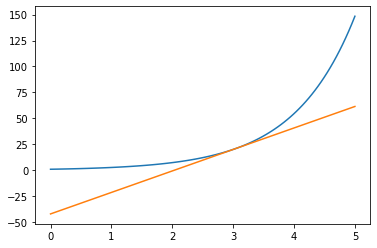

In [35]:
time = np.linspace(0, 5, 100)
OD600 = np.exp(time)
i=60
a=OD600[i]
b=(1-time[i])*OD600[i]
plt.plot(time, OD600)
plt.plot(time,a*(time)+b);

The simple idea behind drawing Slope or Direction Fields is that we can calculate slope of the tangent at any point on the graph since it is simply equal to $f(t, y(t))$ in ODE $\frac{dy(t)}{dt}=f(t,y(t))$ or $kN(t)$ in ODE $\frac{dN(t)}{dt}=kN(t)$.  
So we can draw Direction Fields without solving the ODE.

Let's do it for a range of $N(t)$ and $t$ values for $\frac{dN(t)}{dt}=kN(t)$

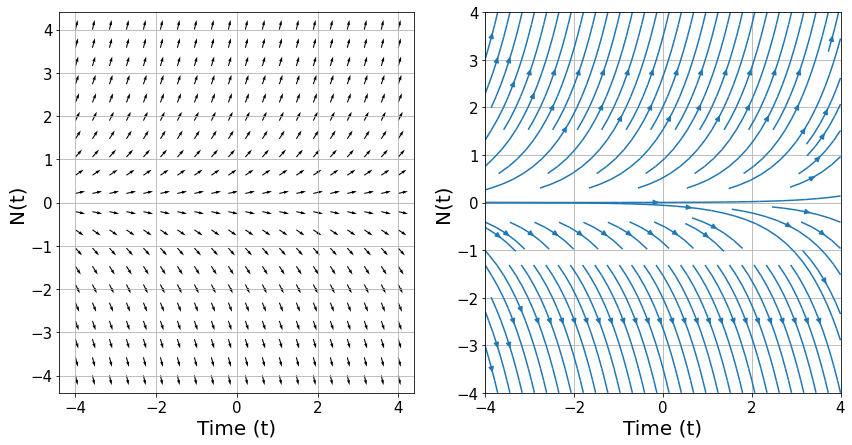

In [49]:
N, t = np.mgrid[-4:4:20j,-4:4:20j]
k = 1
slope = dNdt = k*N

dt, dN = np.cos(np.arctan(slope)), np.sin(np.arctan(slope))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
axs[0].quiver(t, N, dt, dN, angles="xy")
axs[1].streamplot(t, N, dt, dN)

for ax in axs:
    ax.tick_params(labelsize=15)
    ax.grid(which='major', axis='both')
    ax.set_xlabel("Time (t)",fontsize=20)
    ax.set_ylabel("N(t)",fontsize=20)

## Logistic growth

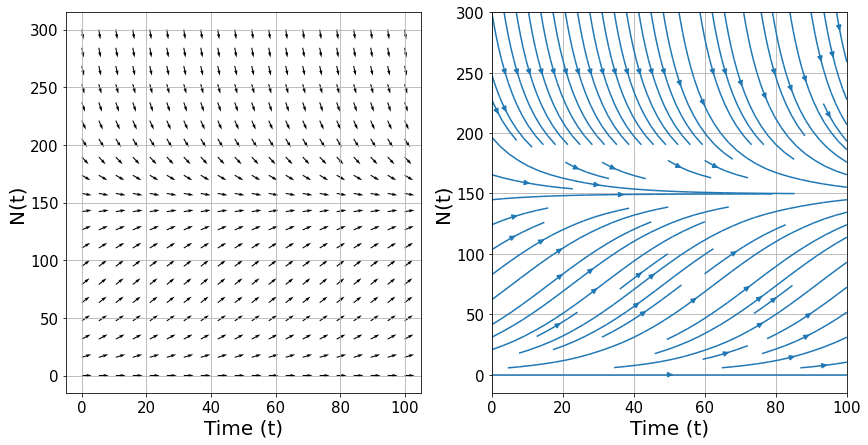

In [50]:
p, t = np.mgrid[0:300:20j,0:100:20j]
slope = 0.0004 * p * (150 - p)

dt, dv = np.cos(np.arctan(slope)), np.sin(np.arctan(slope))
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
axs[0].quiver(t, p, dt, dv, angles="xy")
axs[1].streamplot(t, p, dt, dv)

for ax in axs:
    ax.tick_params(labelsize=15)
    ax.grid(which='major', axis='both')
    ax.set_xlabel("Time (t)",fontsize=20)
    ax.set_ylabel("N(t)",fontsize=20)


plt.show()

## Michaelis-Menter equation approximation